<a href="https://colab.research.google.com/github/halldm2000/NOAA-AI-2020-TUTORIAL/blob/master/sea_ice_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Download sea-ice extent data

source = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
dest    = "/content/data/"
!wget  -c -e robots=off -P {dest} {source}

--2020-10-21 14:16:21--  ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv
           => ‘/content/data/N_seaice_extent_daily_v3.0.csv’
Resolving sidads.colorado.edu (sidads.colorado.edu)... 128.138.135.20
Connecting to sidads.colorado.edu (sidads.colorado.edu)|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /DATASETS/NOAA/G02135/north/daily/data ... done.
==> SIZE N_seaice_extent_daily_v3.0.csv ... 1556411
==> PASV ... done.    ==> RETR N_seaice_extent_daily_v3.0.csv ... done.
Length: 1556411 (1.5M) (unauthoritative)

N_seaice_extent_dai 100%[===================>]   1.48M  3.67MB/s    in 0.4s    

2020-10-21 14:16:22 (3.67 MB/s) - ‘/content/data/N_seaice_extent_daily_v3.0.csv’ saved [1556411]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta

# make directory to store our plots
!mkdir -p images

sec_per_day = 3600*24

def load_data():

    # read sea-ice extent data from CSV file
    csv    = "/content/data/N_seaice_extent_daily_v3.0.csv"
    data   = np.loadtxt(csv, skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
    extent = data[:,3]
    nrows  = data.shape[0]

    # get day of year and total time elapsed
    yday   = np.zeros_like(extent) # day of the year 1..365
    time   = np.zeros_like(extent) # days since jan 1, 1978
    start  = datetime(1978,1,1)

    for i in range(nrows):
      yr, month, day = data[i,0:3].astype(int)
      date    = datetime(yr,month,day)
      yday[i] = date.timetuple().tm_yday
      time[i] = yr+yday[i]/365

    # put each variable in column format
    x = np.reshape(yday,  (-1,1))
    y = np.reshape(extent,(-1,1))
    t = np.reshape(time,  (-1,1))

    return x,y,t 



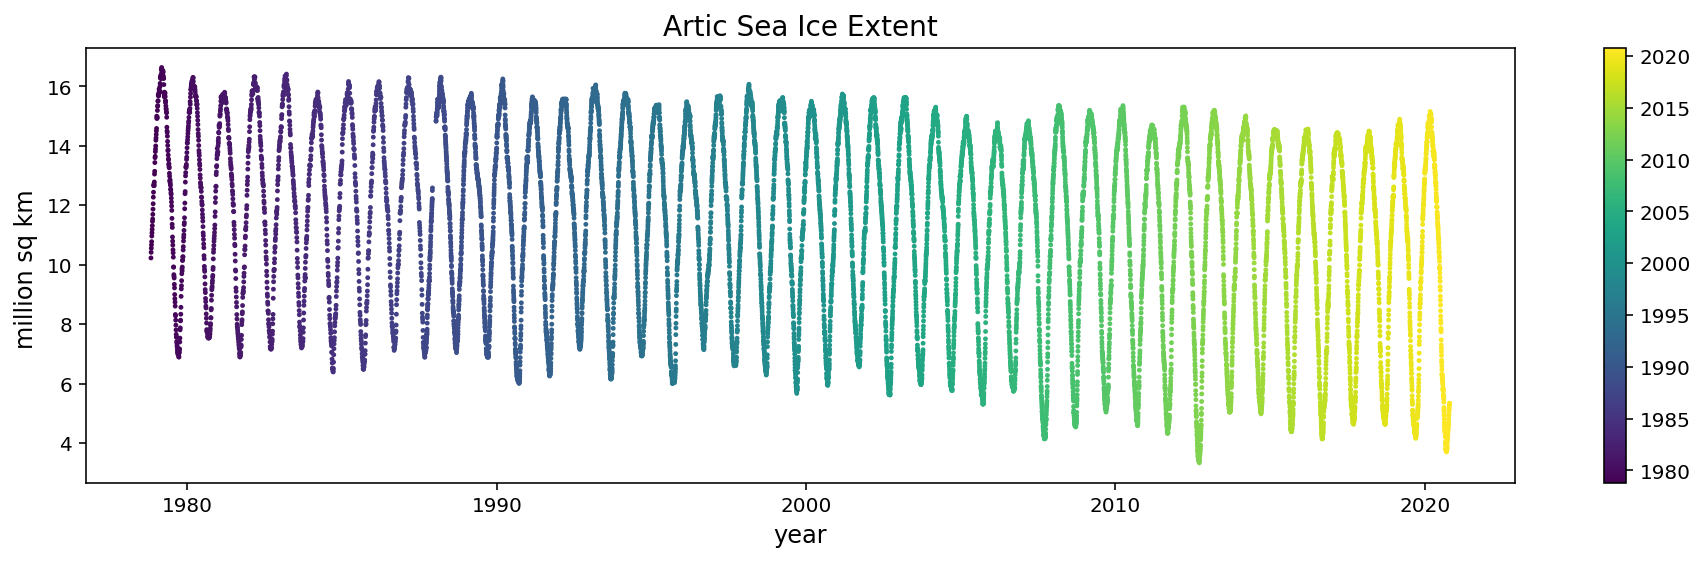

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x,y,t = load_data()
plt.figure(figsize=(16,4),dpi=72*2)
plt.scatter(t,y,c=t,s=2)
#plt.ylim(0,y.max())
plt.colorbar()
plt.xlabel("year", fontsize=12)
plt.ylabel("million sq km ", fontsize=12);
plt.title(f"Artic Sea Ice Extent",fontsize=14);

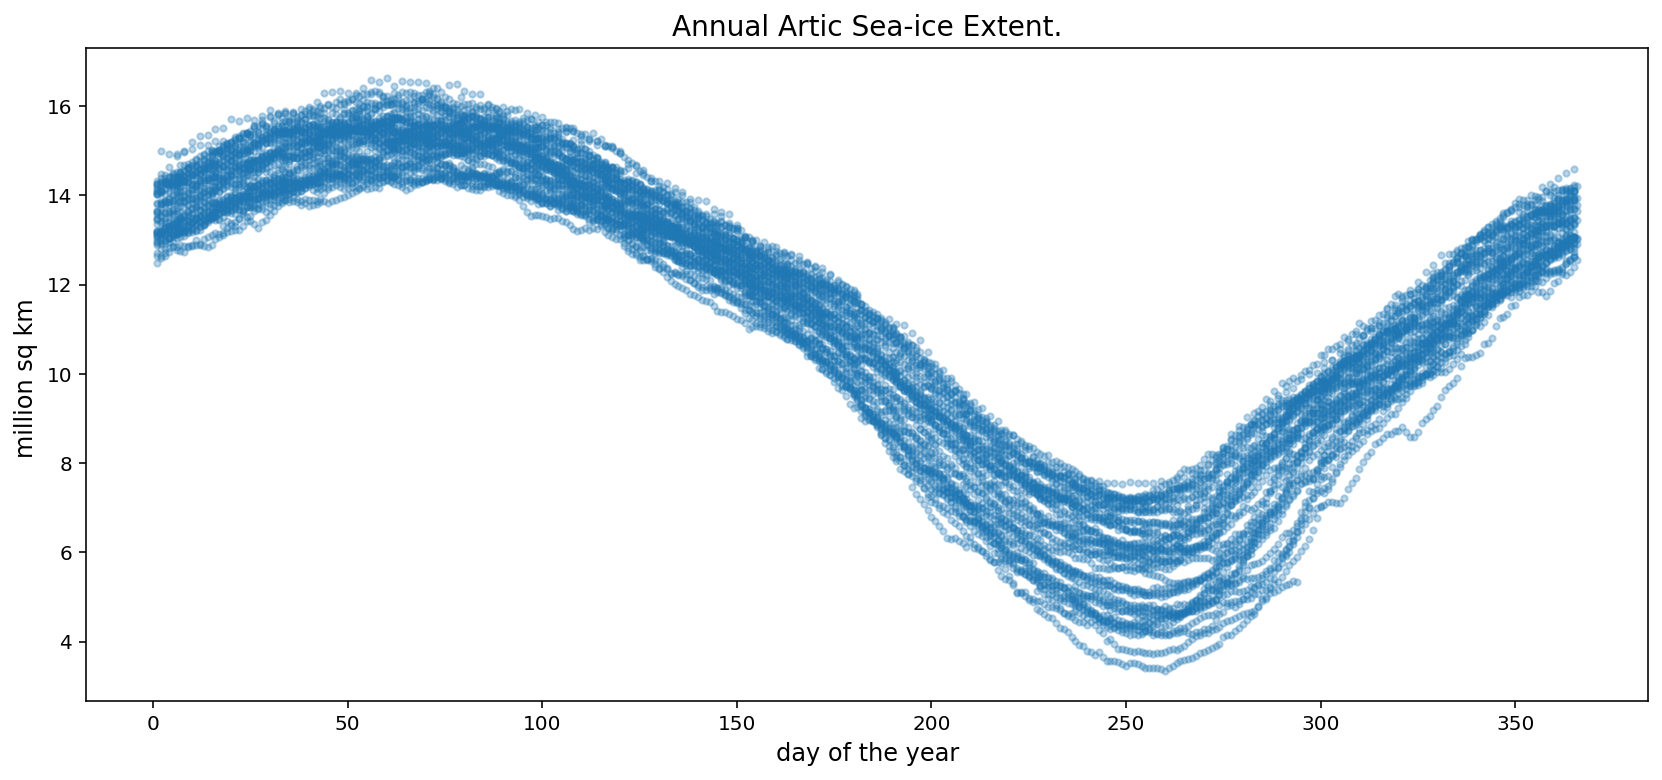

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x,y,t = load_data()
plt.figure(figsize=(14,6),dpi=72*2)
plt.scatter(x,y, s=10, alpha=.3)
plt.xlabel("day of the year", fontsize=12)
plt.ylabel("million sq km ", fontsize=12);
plt.title(f"Annual Artic Sea-ice Extent.",fontsize=14);

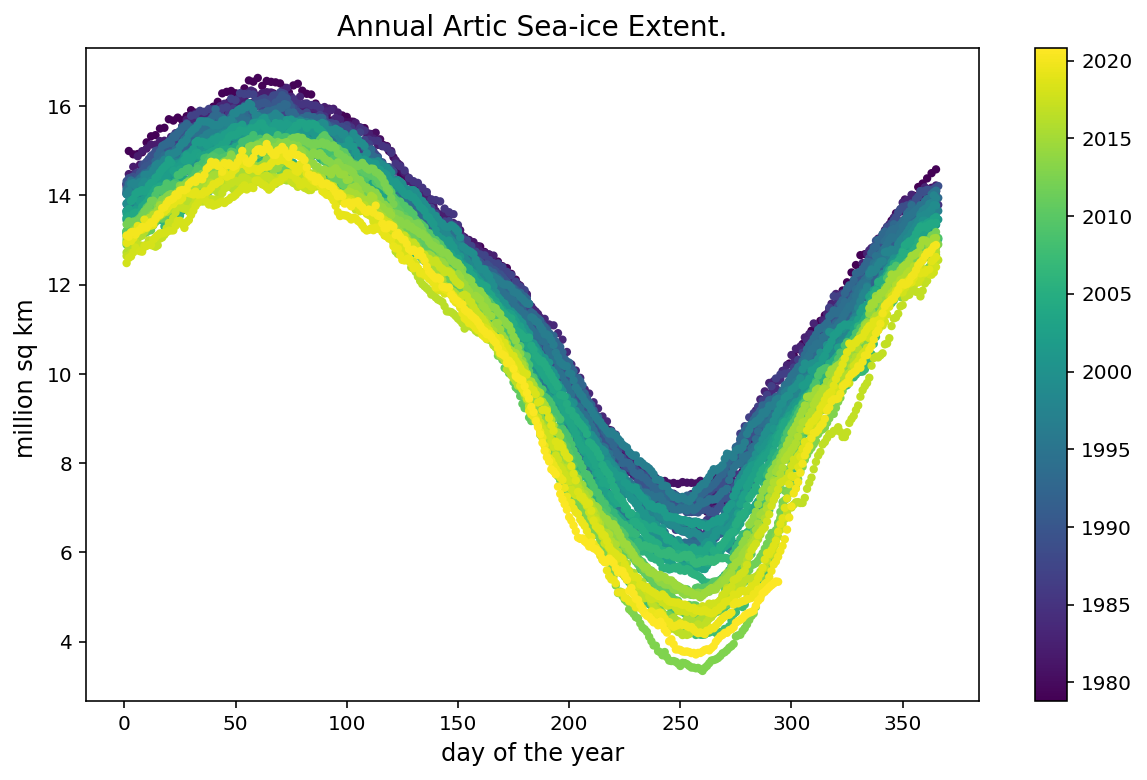

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x,y,t = load_data()
plt.figure(figsize=(10,6),dpi=72*2)
plt.scatter(x,y,c=t, s=10, alpha=1)
plt.colorbar()
plt.xlabel("day of the year", fontsize=12)
plt.ylabel("million sq km ", fontsize=12);
plt.title(f"Annual Artic Sea-ice Extent.",fontsize=14);

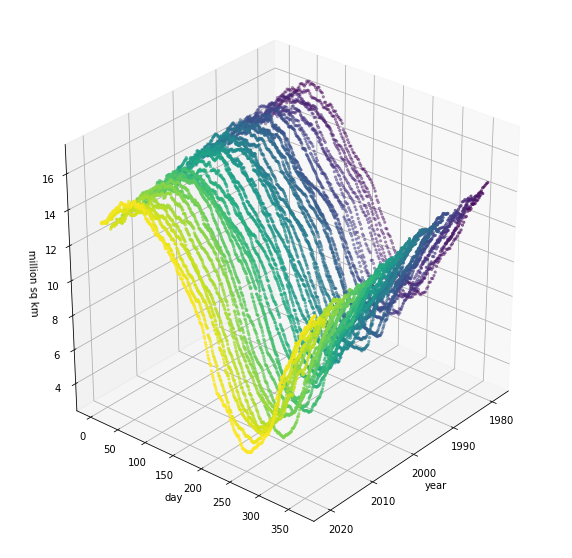

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t, x, y, c=t, marker='.')
ax.set_xlabel('year')
ax.set_ylabel('day')
ax.set_zlabel('million sq km', rotation=90)

ax.view_init(30, 40)
